In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

4422102/4422102 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [5]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

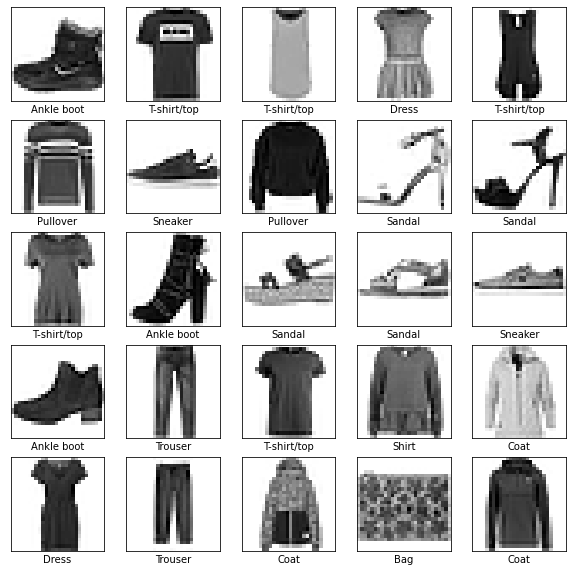

In [6]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i,:,:], cmap = plt.cm.binary)
    plt.xlabel(class_names[ytrain[i]])
plt.show()

In [4]:
Xtrain = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1],
                         Xtrain.shape[2], 1)) / 255.0
Xtest = Xtest.reshape((Xtest.shape[0], Xtest.shape[1],
                       Xtest.shape[2], 1)) / 255.0
print(Xtrain.shape)
print(Xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
from sklearn.model_selection import train_test_split

Xlearn, Xval, ylearn, yval = train_test_split(Xtrain, ytrain,
                                              stratify = ytrain,
                                              test_size = 1 / 6,
                                              random_state = 1234,
                                              shuffle = True)

print(Xlearn.shape)
print(Xval.shape)
print(ylearn.shape)
print(yval.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(50000,)
(10000,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 activation (Activation)     (None, 24, 24, 8)         0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 8)         264       
                                                        

2022-08-06 13:08:43.016983: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


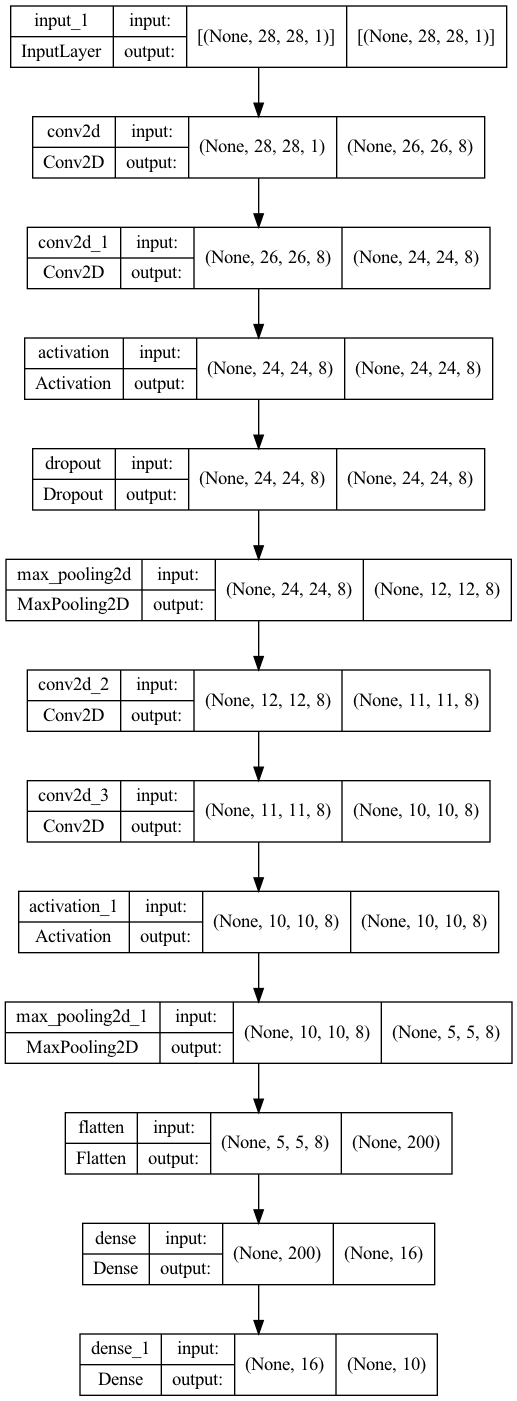

In [6]:
# abstract network
CNN_model = keras.models.Sequential([
    keras.layers.Input(shape = (Xlearn.shape[1], 
                                Xlearn.shape[2],
                                Xlearn.shape[3])),
    keras.layers.Conv2D(filters = 8, kernel_size = (3, 3),
                        strides = 1),
    keras.layers.Conv2D(filters = 8, kernel_size = (3, 3),
                        strides = 1, ),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    keras.layers.Conv2D(filters = 8, kernel_size = (2, 2), 
                        strides = 1),
    keras.layers.Conv2D(filters = 8, kernel_size = (2, 2), 
                        strides = 1),
    keras.layers.Activation("relu"),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

CNN_model.summary()

keras.utils.plot_model(CNN_model, show_shapes = True)

In [7]:
# compiled network
CNN_model.compile(optimizer = "adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])

In [8]:
# learned network
cnn_history = CNN_model.fit(Xlearn, ylearn, epochs = 10,
                            verbose = 1, 
                            validation_data = (Xval, yval))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7023 - accuracy: 0.7369 - val_loss: 0.6097 - val_accuracy: 0.7870
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5055 - accuracy: 0.8083 - val_loss: 0.5669 - val_accuracy: 0.8151
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4529 - accuracy: 0.8342 - val_loss: 0.5172 - val_accuracy: 0.8410
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4208 - accuracy: 0.8490 - val_loss: 0.4819 - val_accuracy: 0.8440
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4020 - accuracy: 0.8535 - val_loss: 0.4677 - val_accuracy: 0.8512
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3859 - accuracy: 0.8587 - val_loss: 0.4351 - val_accuracy: 0.8608
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3774 - accuracy: 0.8605 - val_loss: 0.4233 - val_ac

In [9]:
# learned network
cnn_history = CNN_model.fit(Xlearn, ylearn, epochs = 10,
                            verbose = 1, 
                            validation_data = (Xval, yval))

Epoch 1/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3462 - accuracy: 0.8736 - val_loss: 0.4306 - val_accuracy: 0.8538
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3407 - accuracy: 0.8751 - val_loss: 0.4012 - val_accuracy: 0.8604
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3393 - accuracy: 0.8754 - val_loss: 0.4076 - val_accuracy: 0.8529
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3329 - accuracy: 0.8784 - val_loss: 0.4203 - val_accuracy: 0.8446
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3274 - accuracy: 0.8799 - val_loss: 0.3842 - val_accuracy: 0.8639
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3260 - accuracy: 0.8797 - val_loss: 0.4038 - val_accuracy: 0.8553
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3216 - accuracy: 0.8825 - val_loss: 0.4222 - val_

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               157000    
                                                                 
 dense_3 (Dense)             (None, 16)                3216      
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 160,386
Trainable params: 160,386
Non-trainable params: 0
_________________________________________________________________


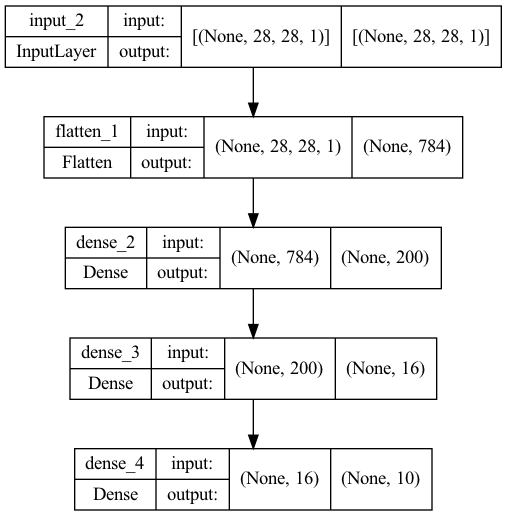

In [10]:
MLP_model = keras.models.Sequential([
    keras.layers.Input(shape = (Xlearn.shape[1], 
                                Xlearn.shape[2],
                                Xlearn.shape[3])),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

MLP_model.summary()

keras.utils.plot_model(MLP_model, show_shapes = True)

In [11]:
# compiled network
MLP_model.compile(optimizer = "adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])

In [12]:
# learned network
mlp_history = MLP_model.fit(Xlearn, ylearn, epochs = 10,
                            verbose = 1, 
                            validation_data = (Xval, yval))

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5224 - accuracy: 0.8157 - val_loss: 0.4106 - val_accuracy: 0.8541
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3855 - accuracy: 0.8606 - val_loss: 0.3632 - val_accuracy: 0.8680
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3444 - accuracy: 0.8738 - val_loss: 0.3489 - val_accuracy: 0.8723
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3220 - accuracy: 0.8819 - val_loss: 0.3439 - val_accuracy: 0.8710
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.8880 - val_loss: 0.3549 - val_accuracy: 0.8725
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2874 - accuracy: 0.8947 - val_loss: 0.3273 - val_accuracy: 0.8790
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2743 - accuracy: 0.8992 - val_loss: 0.3363 - val_accuracy:

In [13]:
# learned network
mlp_history = MLP_model.fit(Xlearn, ylearn, epochs = 10,
                            verbose = 1, 
                            validation_data = (Xval, yval))

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2356 - accuracy: 0.9119 - val_loss: 0.2960 - val_accuracy: 0.8935
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2304 - accuracy: 0.9137 - val_loss: 0.3134 - val_accuracy: 0.8886
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2212 - accuracy: 0.9175 - val_loss: 0.3274 - val_accuracy: 0.8868
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2129 - accuracy: 0.9202 - val_loss: 0.3037 - val_accuracy: 0.8938
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2096 - accuracy: 0.9217 - val_loss: 0.3350 - val_accuracy: 0.8839
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2009 - accuracy: 0.9247 - val_loss: 0.3035 - val_accuracy: 0.8972
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1964 - accuracy: 0.9256 - val_loss: 0.3093 - val_accuracy:

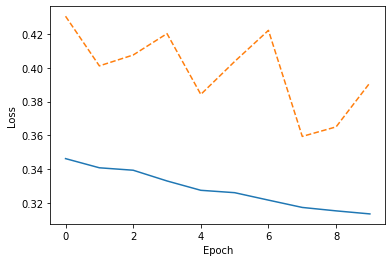

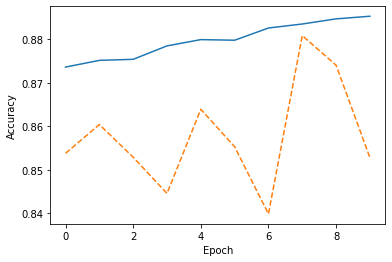

In [14]:
plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"], "--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

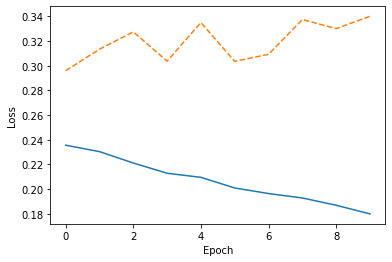

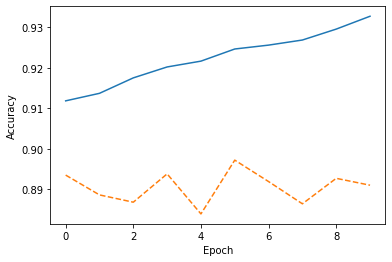

In [15]:
plt.plot(mlp_history.history["loss"])
plt.plot(mlp_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(mlp_history.history["accuracy"])
plt.plot(mlp_history.history["val_accuracy"], "--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

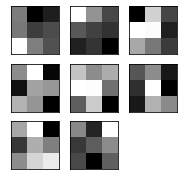

In [16]:
plt.figure(figsize = (3, 3))
for i in range(8):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(CNN_model.layers[0].weights[0].numpy()[:, :, 0, i], cmap = plt.cm.binary)
plt.show()

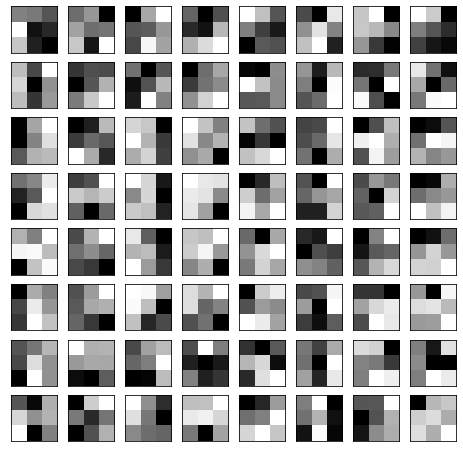

In [17]:
plt.figure(figsize = (8, 8))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(CNN_model.layers[1].weights[0].numpy()[:, :, i, j], cmap = plt.cm.binary)
plt.show()

In [18]:
digit_mnist = keras.datasets.mnist
fashion_mnist = keras.datasets.fashion_mnist

(XtrainD, ytrainD), (XtestD, ytestD) = digit_mnist.load_data()

(XtrainF, ytrainF), (XtestF, ytestF) = fashion_mnist.load_data()

print(XtrainD.shape)
print(ytrainD.shape)
print(XtestD.shape)
print(ytestD.shape)

print(XtrainF.shape)
print(ytrainF.shape)
print(XtestF.shape)
print(ytestF.shape)

XlearnD, XvalD, ylearnD, yvalD = train_test_split(XtrainD, ytrainD,
                                              stratify = ytrainD,
                                              test_size = 1 / 6,
                                              random_state = 1234,
                                              shuffle = True)

XlearnF, XvalF, ylearnF, yvalF = train_test_split(XtrainF, ytrainF,
                                              stratify = ytrainF,
                                              test_size = 1 / 6,
                                              random_state = 1234,
                                              shuffle = True)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [19]:
def create_cnn_model(input_shape = (28, 28, 1), is_binary = False, class_count = 10):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    model.add(keras.layers.Conv2D(filters = 8,
                                  kernel_size = (3, 3),
                                  strides = 1))
    model.add(keras.layers.Conv2D(filters = 8, 
                                  kernel_size = (3, 3),
                                  strides = 1))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.MaxPool2D(pool_size = (2, 2),
                                     strides = 2))
    model.add(keras.layers.Conv2D(filters = 8,
                                  kernel_size = (2, 2),
                                  strides = 1))
    model.add(keras.layers.Conv2D(filters = 8,
                                  kernel_size = (2, 2),
                                  strides = 1))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.MaxPool2D(pool_size = (2, 2),
                                     strides = 2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(16, activation = "relu"))
    if is_binary:
        model.add(keras.layers.Dense(1, activation = "sigmoid"))
        model.compile(loss = "binary_crossentropy",
                      optimizer = "adam",
                      metrics = ["accuracy"])
    else:
        model.add(keras.layers.Dense(class_count, activation = "softmax"))
        model.compile(loss = "sparse_categorical_crossentropy",
                      optimizer = "adam",
                      metrics = ["accuracy"])
    return model

In [20]:
CNN_modelD = create_cnn_model()

CNN_modelD.summary()

early_stop = keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                           patience = 3)
model_save = keras.callbacks.ModelCheckpoint("./checkpointD",
                                             monitor = "val_accuracy",
                                             save_best_only = True,
                                             save_weights_only = True,
                                             mode = "max")

epochs = 10
batch_size = 32
cnn_historyD = CNN_modelD.fit(XlearnD, ylearnD,
                              epochs = epochs,
                              batch_size = batch_size,
                              verbose = 1,
                              validation_data = (XvalD, yvalD),
                              callbacks = [early_stop, model_save])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 activation_2 (Activation)   (None, 24, 24, 8)         0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 8)         264       
                                                      

In [21]:
CNN_modelD.load_weights("./checkpointD")
CNN_modelD.evaluate(XlearnD, ylearnD)
CNN_modelD.evaluate(XvalD, yvalD)
CNN_modelD.evaluate(XtestD, ytestD)

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9731


[0.10502832382917404, 0.9731000065803528]

In [22]:
CNN_modelD.load_weights("./checkpointD")
CNN_modelD.evaluate(XlearnF, ylearnF)
CNN_modelD.evaluate(XvalF, yvalF)
CNN_modelD.evaluate(XtestF, ytestF)

313/313 [==============================] - 1s 2ms/step - loss: 3.5059 - accuracy: 0.0791


[3.50588321685791, 0.07909999787807465]

In [23]:
CNN_modelF = create_cnn_model()

CNN_modelF.summary()

early_stop = keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                           patience = 3)
model_save = keras.callbacks.ModelCheckpoint("./checkpointF",
                                             monitor = "val_accuracy",
                                             save_best_only = True,
                                             save_weights_only = True,
                                             mode = "max")

epochs = 10
batch_size = 32
cnn_historyF = CNN_modelF.fit(XlearnF, ylearnF,
                              epochs = epochs,
                              batch_size = batch_size,
                              verbose = 1,
                              validation_data = (XvalF, yvalF),
                              callbacks = [early_stop, model_save])




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 activation_4 (Activation)   (None, 24, 24, 8)         0         
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 8)         264       
                                                      

In [24]:
CNN_modelF.load_weights("./checkpointF")
CNN_modelF.evaluate(XlearnF, ylearnF)
CNN_modelF.evaluate(XvalF, yvalF)
CNN_modelF.evaluate(XtestF, ytestF)

313/313 [==============================] - 1s 2ms/step - loss: 0.5427 - accuracy: 0.7919


[0.5426698923110962, 0.7918999791145325]

In [25]:
CNN_modelD.save_weights("digit_weights")

In [26]:
transferred_to_F = keras.models.clone_model(CNN_modelD)
transferred_to_F.load_weights("digit_weights")

In [27]:
transferred_to_F.compile(loss = "sparse_categorical_crossentropy",
                         optimizer = "adam",
                         metrics = ["accuracy"])

In [28]:
transfer_history = transferred_to_F.fit(XlearnF, ylearnF,
                                        epochs = epochs,
                                        batch_size = batch_size,
                                        verbose = 1,
                                        validation_data = (XvalF, yvalF),
                                        callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6720 - accuracy: 0.7564 - val_loss: 0.5923 - val_accuracy: 0.7734
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4794 - accuracy: 0.8240 - val_loss: 0.4919 - val_accuracy: 0.8308
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4423 - accuracy: 0.8364 - val_loss: 0.4581 - val_accuracy: 0.8318
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4243 - accuracy: 0.8445 - val_loss: 0.4991 - val_accuracy: 0.8151
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4107 - accuracy: 0.8500 - val_loss: 0.4727 - val_accuracy: 0.8239
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4012 - accuracy: 0.8512 - val_loss: 0.4258 - val_accuracy: 0.8497
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3961 - accuracy: 0.8534 - val_loss: 0.4670 - val_ac

In [29]:
transferred_to_F.evaluate(XlearnF, ylearnF)
transferred_to_F.evaluate(XvalF, yvalF)
transferred_to_F.evaluate(XtestF, ytestF)

313/313 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8346


[0.43430155515670776, 0.8345999717712402]

In [30]:
finetuned_to_F = keras.models.clone_model(CNN_modelD)
finetuned_to_F.load_weights("digit_weights")

In [31]:
for layer in finetuned_to_F.layers[:-2]:
    layer.trainable = False
    
finetuned_to_F.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 activation_2 (Activation)   (None, 24, 24, 8)         0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 8)         264       
                                                      

In [32]:
finetuned_to_F.compile(loss = "sparse_categorical_crossentropy",
                       optimizer = "adam",
                       metrics = ["accuracy"])

finetune_history = finetuned_to_F.fit(XlearnF, ylearnF,
                                      epochs = epochs,
                                      batch_size = batch_size,
                                      verbose = 1,
                                      validation_data = (XvalF, yvalF),
                                      callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8200 - accuracy: 0.7028 - val_loss: 0.7520 - val_accuracy: 0.7129
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5900 - accuracy: 0.7738 - val_loss: 0.6834 - val_accuracy: 0.7382
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5607 - accuracy: 0.7879 - val_loss: 0.6504 - val_accuracy: 0.7575
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5462 - accuracy: 0.7935 - val_loss: 0.6558 - val_accuracy: 0.7522
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5364 - accuracy: 0.7984 - val_loss: 0.6187 - val_accuracy: 0.7720
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5255 - accuracy: 0.8038 - val_loss: 0.6361 - val_accuracy: 0.7587
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5208 - accuracy: 0.8048 - val_loss: 0.6390 - val_accuracy:

In [33]:
finetuned_to_F.evaluate(XlearnF, ylearnF)
finetuned_to_F.evaluate(XvalF, yvalF)
finetuned_to_F.evaluate(XtestF, ytestF)

313/313 [==============================] - 1s 3ms/step - loss: 0.6015 - accuracy: 0.7818


[0.6015031337738037, 0.7817999720573425]

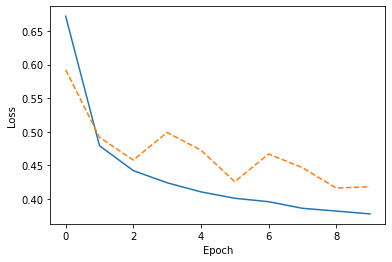

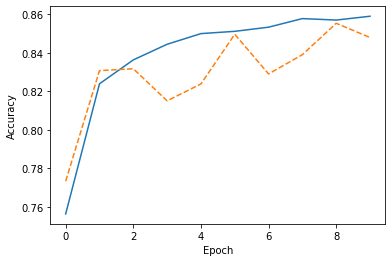

In [34]:
plt.plot(transfer_history.history["loss"])
plt.plot(transfer_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(transfer_history.history["accuracy"])
plt.plot(transfer_history.history["val_accuracy"], "--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

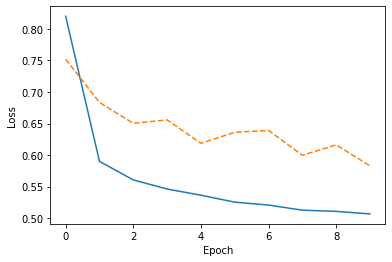

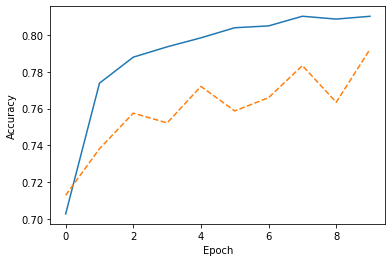

In [35]:
plt.plot(finetune_history.history["loss"])
plt.plot(finetune_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(finetune_history.history["accuracy"])
plt.plot(finetune_history.history["val_accuracy"], "--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()